# 1. Error Function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import math

$$ erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt. $$
위와 같이 주어지는 에러함수를 수치적분을 이용하여 구하고 그래프를 그려라. (어떤 방법을 이용하든 관계없음)


In [2]:
def error(t):
    return 2/math.sqrt(math.pi)*np.exp(-t**2)

In [3]:
def integ(g,a,b,dt):
    s,t = 0, a
    while(t<b):
        s += 0.5*dt*(g(t)+g(t+dt))
        t += dt
    return s

In [4]:
x = np. arange(0,10,0.1)
error1 = [integ(error,0,i,0.1) for i in x]
print(error1)

[0, 0.11227653869422248, 0.2223408583889125, 0.3281106432251038, 0.42775075364801735, 0.519766947536755, 0.676994162675483, 0.7413071950088833, 0.796154913033775, 0.8420087166168229, 0.8795880713775148, 0.909779268617354, 0.9335568853073345, 0.9335568853073345, 0.9519143700310019, 0.9658079698760472, 0.976115937268926, 0.9836129422254667, 0.9889580804169107, 0.9926939036052836, 0.9952534898947606, 0.9969726216624555, 0.9981045119156916, 0.9988350705310637, 0.9992973038272338, 0.9995840004727953, 0.9997583171867991, 0.999862215927278, 0.999922922562481, 0.9999576935043174, 0.9999772167015408, 0.999987962517478, 0.9999937605625945, 0.9999968273048934, 0.9999984174114673, 0.999999225628858, 0.9999996283300391, 0.9999998250235855, 0.9999999192016042, 0.9999999634055412, 0.999999983744281, 0.9999999929178544, 0.9999999969739125, 0.9999999987319197, 0.9999999994788631, 0.9999999997899666, 0.9999999999678247, 0.9999999999877707, 0.999999999995442, 0.9999999999983342, 0.9999999999994031, 0.999

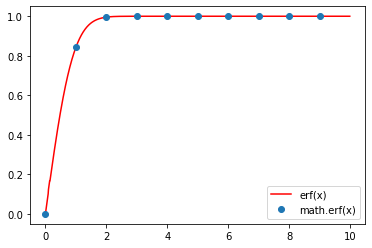

In [5]:
y = np.arange(0,10,0.01)
z = np.arange(0,10,1)
error2 = [integ(error,0,i,0.01) for i in y]
plt.plot(y,error2,color = 'red',label='erf(x)')
erf = np.vectorize(math.erf)
plt.plot(z,erf(z),'o',label='math.erf(x)')
plt.legend()

math library에서 주어진 erf 함수와 같은 형태이다.

$$
\begin{align}
erf(x) &amp;= \frac{2}{\sqrt\pi} \sum_{n=0}^{\infty} \frac{ (-1)^n x^{2n+1}} { (2n+1) n!}  \\
&amp;= \frac{2}{\sqrt\pi} \left( x - \frac{x^3}{3} + \frac{x^5}{10} - \frac{x^7}{42} + \cdots \right)
\end{align}
$$
에러함수를 테일러 전개하면 위와 같이 주어진다. 위의 전개식과 적분결과를 그래프로 그리고 비교하여라.

In [6]:
def ert(y,N):# 테일러 전개가 2/pi 로 나와있어서 맞는 형태인 2/sqrt(pi)로 수정했습니다.
    n, s = 0, 0
    while (n<N):
        s += 2/math.sqrt(math.pi)*(((-1)**n)*(y**(2*n+1)))/((2*n+1)*math.factorial(n))
        n += 1
    return s

(0.0, 5.0)

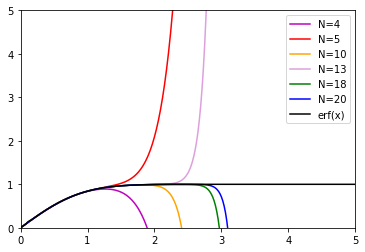

In [7]:
plt.plot(y,ert(y,4),color = 'm',label='N=4')
plt.plot(y,ert(y,5),color = 'red',label='N=5')
plt.plot(y,ert(y,10),color = 'orange',label='N=10')
plt.plot(y,ert(y,13),color = 'plum',label='N=13')
plt.plot(y,ert(y,18),color = 'green',label='N=18')
plt.plot(y,ert(y,20),color = 'blue',label='N=20') # N>20 인 경우는 계산이 안 돼서 N=20 까지만 비교했습니다.
plt.plot(y,error2,color = 'black',label='erf(x)')

plt.legend()
plt.xlim(0,5)
plt.ylim(0,5)

N이 증가할 수록 에러함수와 겹치는 부분이 늘어나기 때문에 N->$\infty$ 인 경우 
그래프가 완전 겹칠 것이다.

# 2. (Integration) Trigonometric Function


sin, cos함수를 trapezoidal 방법을 이용하여 직접 적분하고 그래프를 그려라.

In [8]:
def f(x):
    return math.sin(x)
def g(x):
    return math.cos(x)

In [9]:
def trapez(h,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += 0.5*dx*(h(x)+h(x+dx))
        x += dx
    return s

In [10]:
A = np.linspace(0,3*math.pi)
sin = [trapez(f,0,i,1000) for i in A]
sin2 = [trapez(f,math.pi/2,i,1000) for i in A]
cos = [trapez(g,0,i,1000) for i in A]
print(sin)
print(cos)

[0, 0.018477629019260238, 0.07322766984931363, 0.16191189061563707, 0.282186085562236, 0.4286723408186607, 0.5952165908164062, 0.7774789485935172, 0.9694862171563379, 1.1613082573321316, 1.3471690718865141, 1.520200121977538, 1.6723001478479211, 1.8014126832928254, 1.9009677192199796, 1.9680212989863204, 1.9981362644513605, 1.9913648029160553, 1.9479571593334974, 1.8695174789168238, 1.7589445251843385, 1.6203245549985725, 1.4587803094471667, 1.2802817011662928, 1.0960210796015502, 0.8991900296869035, 0.7154709222626686, 0.5328624427063912, 0.37650928809839734, 0.23494952423322216, 0.12586389419093363, 0.05094410205511464, 0.007441675394296373, 0.0020546003516328836, 0.03438449676099746, 0.09903075809296122, 0.20274625998234969, 0.3276977266567822, 0.4878692990324669, 0.6546318758666464, 0.8479956474659556, 1.0320462289928019, 1.2303827353766388, 1.4047753352785415, 1.5790278360607937, 1.7183386224160395, 1.8428699728961293, 1.9269036344977157, 1.9815450816481275, 1.9999851955715489]
[0

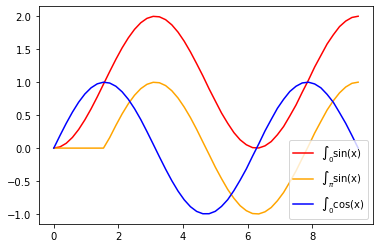

In [11]:
plt.plot(A,sin, color = 'red',label='$\int_0$sin(x)')
plt.plot(A,sin2, color = 'orange',label='$\int_\pi$sin(x)')
plt.plot(A,cos, color = 'blue',label='$\int_0$cos(x)')
plt.legend()

빨간 sine 그래프가 y축으로 +1 만큼 이동한 건 시작지점 설정을 0으로해서 그렇다. 

시작 지점을 $\pi$/2 로 설정한 주황 그래프에서는 예상한 -cos(x) 그래프가 나타난다.

하지만 trapez 함수의 조건이 x<b 라서, x>b 인 [0,$\pi$/2] 부분은 0으로 표시된다.

sin, cos함수를 scipy.integrate 함수를 이용하여 적분하고 그래프를 그려라.

In [12]:
sin3 = [integrate.romberg(f,0,i) for i in A]
sin4 = [integrate.romberg(f,math.pi/2,i) for i in A]
cos3 = [integrate.romberg(g,0,i) for i in A]
print(sin3)
print(cos3)

[0.0, 0.01844084300845158, 0.07308324265398533, 0.16191189510856543, 0.2816506499022719, 0.42788333987782434, 0.595216656877554, 0.7774790660433629, 0.9679484224267884, 1.159599895033379, 1.3453650544213094, 1.518392568310532, 1.6723008902613394, 1.8014136218680228, 1.900968867902596, 1.967294863039468, 1.9979453927513493, 1.9917900138254483, 1.9490557470152032, 1.8713187041322639, 1.7614459583691333, 1.623489801858731, 1.46253829024083, 1.2845275866310235, 1.096023025907665, 0.9039769740922898, 0.7154724133689223, 0.5374617097590964, 0.37651019814116926, 0.2385540416307376, 0.12868129587645682, 0.0509442529891756, 0.008209986176654758, 0.002054607249740505, 0.032705136961440374, 0.09903113209881848, 0.19858637813465788, 0.32769910973868194, 0.48160743168947356, 0.6546349455786905, 0.8404001049666178, 1.032051577571652, 1.2225209339563081, 1.4047833431223837, 1.5721166601221557, 1.7183493500977063, 1.8380881048918112, 1.9269167573459802, 1.981559156991006, 1.9999999999999176]
[0.0, 0.1

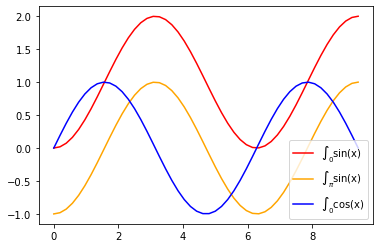

In [13]:
plt.plot(A,sin3,color = 'red',label='$\int_0$sin(x)')
plt.plot(A,sin4,color = 'orange',label='$\int_\pi$sin(x)')
plt.plot(A,cos3,color = 'blue',label='$\int_0$cos(x)')
plt.legend()

scipy.integrate 를 이용한 그래프에서도 시작지점을 0으로 한 빨간 그래프의 시작 위치를 $\pi$/2로 바꿔서 

-cos(x) 그래프로 만든 주황 그래프를 추가했다. 

integrate.romberg 는 trapezoidal 방식과 달리 x>b인 상황도 계산해서 그래프에 짤린 부분이 없다.


구체적으로 $\int_0^x sin(t) dt$, $\int_0^x cos(t) dt$를 x에 대해서 그려라.

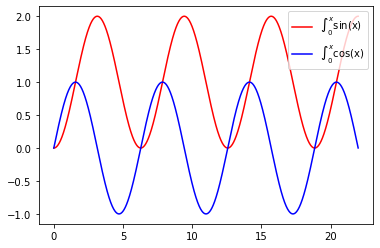

In [14]:
B = np.arange(0,7*math.pi,0.01)
SIN = [integrate.romberg(f,0,i) for i in B]
COS = [integrate.romberg(g,0,i) for i in B]
plt.plot(B,SIN,color='red',label='$\int_0^x$sin(x)')
plt.plot(B,COS,color='blue',label='$\int_0^x$cos(x)')
plt.legend()

# 3. (Differentiation) Trigonometric Function

sin, cos함수의 도함수를 finite difference 방법을 이용하여 구현하고 그래프를 그려라.

In [15]:
def f(x):
    return math.sin(x)
def g(x):
    return math.cos(x)
C = np.arange(0,2*math.pi,0.01)

In [16]:
def cen_diff(h,x,dx):
    return ((h(x+dx)-h(x))/(2*dx)+(h(x)-h(x-dx))/(2*dx))

In [17]:
diffsin = [cen_diff(f,i,0.01) for i in C]
print(diffsin)

[0.9999833334166665, 0.999933334666654, 0.9997833434164498, 0.9995333746650542, 0.9991834534091335, 0.9987336146405221, 0.9981839033427216, 0.9975343744864047, 0.9967850930239135, 0.9959361338827722, 0.9949875819581878, 0.9939395321045603, 0.9927920891260024, 0.9915453677658559, 0.9901994926952193, 0.9887545985004755, 0.9872108296698406, 0.9855683405789115, 0.9838272954752286, 0.9819878684618519, 0.9800502434799505, 0.9780146142904067, 0.9758811844544426, 0.9736501673132641, 0.9713217859667278, 0.968896273251027, 0.9663738717154104, 0.9637548335979323, 0.9610394208002221, 0.9582279048612918, 0.9553205669303982, 0.9523176977389108, 0.9492195975712436, 0.9460265762348319, 0.9427389530291513, 0.9393570567137799, 0.9358812254755322, 0.9323118068946368, 0.928649157909972, 0.9248936447833922, 0.9210456430630759, 0.9171055375459841, 0.9130737222393936, 0.9089506003214731, 0.9047365841009736, 0.9004320949760086, 0.8960375633919049, 0.8915534287981558, 0.8869801396044874, 0.882318153136008, 0.8

In [18]:
diffcos = [cen_diff(g,i,0.01) for i in C]
print(diffcos)

[0.0, -0.009999666671112184, -0.019998333383886013, -0.029995000279992023, -0.03998866770106302, -0.04997833628868631, -0.059963007084334885, -0.06994168162923753, -0.07991336206426558, -0.08987705122968093, -0.09983175276487288, -0.10977647120797851, -0.11971021209543631, -0.12963198206145665, -0.13954078893729238, -0.14943564185051494, -0.15931555132407405, -0.16917952937527403, -0.17902658961452267, -0.18885574734399113, -0.19866601965610187, -0.20845642553180554, -0.21822598593866926, -0.22797372392879822, -0.23769866473650758, -0.2473998358758167, -0.25707626723771027, -0.2667269911871162, -0.27635104265966715, -0.28594745925825116, -0.29551528134919014, -0.3050535521582576, -0.3145613178663187, -0.3240376277047319, -0.33348153405040604, -0.3428920925205692, -0.3522683620672207, -0.3616094050712282, -0.3709142874360749, -0.3801820786812571, -0.38941185203539286, -0.3986026845288426, -0.40775365708600186, -0.4168638546172443, -0.42593236611040974, -0.4349582847219091, -0.4439407078

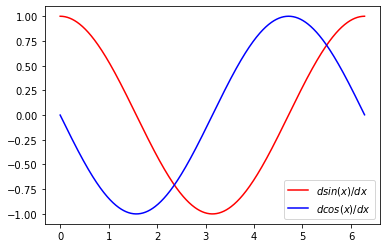

In [19]:
plt.plot(C,diffsin,color='red',label='$dsin(x)/dx$')
plt.plot(C,diffcos,color='blue',label='$dcos(x)/dx$')
plt.legend()

sin, cos함수의 도함수를 scipy.misc.derivative 함수를 이용하여 구하고 그래프를 그려라.

In [20]:
from scipy.misc import derivative
derisin = [derivative(f,i,dx=0.001,n=1) for i in C]
print(derisin)

[0.9999998333333416, 0.9999498337583392, 0.9997998400332522, 0.999549867157324, 0.9991999401276381, 0.9987500939365977, 0.9982003735684551, 0.9975508339947827, 0.9968015401690122, 0.9959525670198838, 0.995003999444008, 0.993955932297362, 0.9928084703857698, 0.9915617284544792, 0.990215831176644, 0.9887709131408823, 0.9872271188377524, 0.9855846026454451, 0.983843528814185, 0.9820040714498962, 0.9800664144968274, 0.9780307517190112, 0.9758972866810434, 0.9736662327276546, 0.9713378129623806, 0.9689122602252465, 0.9663898170695351, 0.9637707357374181, 0.9610552781348647, 0.9582437158054125, 0.9553363299028561, 0.952333411163464, 0.9492352598765574, 0.946042185854673, 0.9427545084025879, 0.9393725562852617, 0.9358966676951408, 0.9323271902181574, 0.9286644807990629, 0.924908905705818, 0.9210608404927323, 0.917120669963134, 0.913088788130817, 0.9089655981806, 0.9047515124280259, 0.9004469522781722, 0.8960523481834626, 0.8915681396006458, 0.8869947749468032, 0.8823327115546342, 0.8775824156

In [21]:
dericos = [derivative(g,i,dx=0.001,n=1) for i in C]
print(dericos)

[0.0, -0.009999831667495407, -0.01999866336022116, -0.02999549520327216, -0.039989327521749995, -0.04997916094084953, -0.059963996485445925, -0.06994283568040327, -0.0799146806501061, -0.08987853421826841, -0.09983340000796481, -0.10977828254077338, -0.11971218733686229, -0.12963412101402172, -0.1395430913870288, -0.14943810756723463, -0.15931818006120757, -0.16918232086993168, -0.17902954358756107, -0.1888588635000077, -0.19866929768352914, -0.20845986510276138, -0.21822958670925097, -0.2279774855389327, -0.2377025868100513, -0.24740391802052786, -0.25708050904538204, -0.266731392233599, -0.2763556025048297, -0.2859521774461471, -0.2955201574080246, -0.3050585856003707, -0.31456650818834087, -0.324042974387706, -0.3334870365596099, -0.34289775030582614, -0.3522741745627389, -0.36161537169571156, -0.3709204075929007, -0.3801883517584037, -0.3894182774055732, -0.398609261549554, -0.4077603850995426, -0.41687073295071375, -0.4259393940760914, -0.43496546161697625, -0.44394803297415075, -

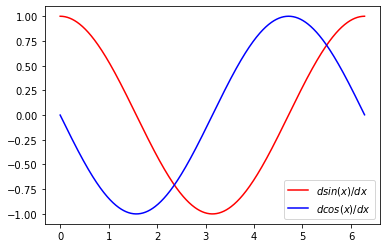

In [22]:
plt.plot(C,derisin,color='red',label='$dsin(x)/dx$')
plt.plot(C,dericos,color='blue',label='$dcos(x)/dx$')
plt.legend()